# Analysis of pima-indians-diabetes dataset using Linear regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

<h3>Use the “pima-indians-diabetes.csv” dataset and note down the meta information.</h3>

MetaData-<br>
For Each Attribute: (all numeric-valued)	<br>		
preg - Number of times pregnant <br><br>
plas - Plasma glucose concentration a 2 hours in an oral glucose tolerance test	<br>		
pres - Diastolic blood pressure (mm Hg)	<br>	
skin - Triceps skin fold thickness (mm)	<br>	
insu - Hour serum insulin (mu U/ml)<br>			
mass - Body mass index (weight in kg/(height in m)^2)<br>	
pedi - Diabetes pedigree function<br>		
age - Age (years)<br>		
class - Class variable (0 or 1), 1 = tested_positive, 0 = tested_negative		

<h3>Compute mean & standard deviation , tabulate and visualize the age of the patients</h3>

In [2]:
age_mean = df["age"].mean()
age_std = df["age"].std()
print("Mean: ",age_mean)
print("Standard Deviation: ",age_std)

Mean:  33.240885416666664
Standard Deviation:  11.76023154067868


In [3]:
df["age"].isnull().value_counts()

False    768
Name: age, dtype: int64

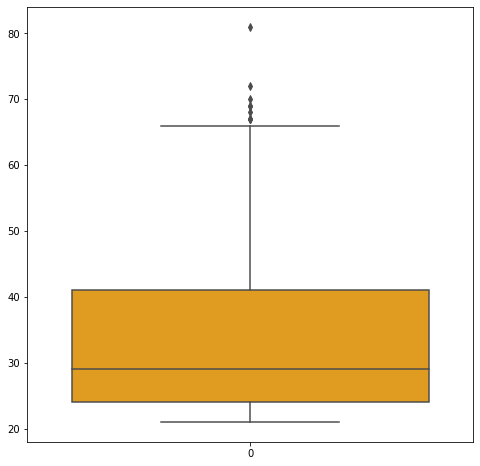

In [4]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df["age"],color='orange')
plt.show()

<h3>Analyze and tabulate the relationship of age, BMI of patients with respect to the class.</h3>

In [5]:
age_class = pd.crosstab(df["age"],df["class"])
#age_class

In [6]:
bmi_class = pd.crosstab(df["mass"],df["class"])
#bmi_class

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


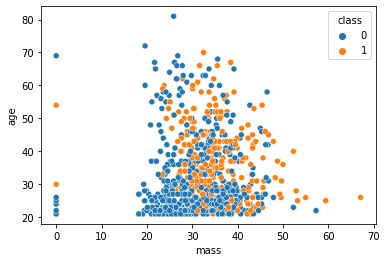

In [7]:
sns.scatterplot(df["mass"],df["age"],hue=df["class"])
plt.show()

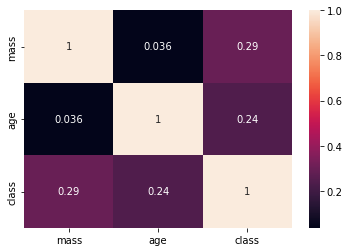

In [8]:
real = df[["mass","age","class"]]
corr = real.corr()
sns.heatmap(corr,annot = True)
plt.show()

Here the relationship between mass(BMI), age and class can be seen

<h3>Tabulate the class label and comment on whether the classes are balanced.</h3>

In [9]:
cls = df["class"].value_counts()
cls = pd.DataFrame(cls)
cls

,class
0,500
1,268


We can see that the classes are not balanced<br> number of class 1 (positive) is almost half of number of class 0 (negative)

<h3>Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide 
the dataset into training and test set (70,30) using train_test_split method in sklearn.</h3>

In [10]:
x = df.iloc[:,:-1]
y = df["class"]

In [12]:
from sklearn import preprocessing
import numpy as np
X_train = np.array(x)
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = lr.predict(x_test)

In [14]:
y_test_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

<h3>Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion 
matrix using a heat map.</h3>

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred)
cm

array([[139,  12],
       [ 34,  46]], dtype=int64)

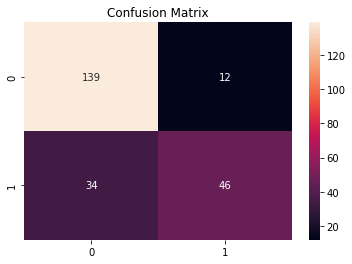

In [16]:
sns.heatmap(cm,annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.show()

<h3>Compute accuracy rate, true positive and true negative rate and comment on the performance</h3>

In [17]:
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TN = cm[0,0]

In [18]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Accuracy Rate
ACC = (TP+TN)/(TP+FP+FN+TN)
print("True Positivity Rate: ",TPR)
print("True Negative Rate: ",TNR)
print("Accuracy Rate: ",ACC)

True Positivity Rate:  0.575
True Negative Rate:  0.9205298013245033
Accuracy Rate:  0.8008658008658008


<h3>Visualize the ROC curve, and comment on the performance of the classifier.</h3>

In [19]:
from sklearn import metrics
y_pred_prob = lr.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)

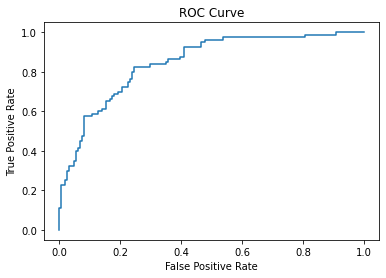

In [20]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
r=roc_auc_score(y_test,y_pred_prob)
print("ROC_AUC_SCORE: ",r)

ROC_AUC_SCORE:  0.8480960264900663
